# Next Word Prediction:

### Importing The Required Libraries:

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import string

In [6]:
file = open("metamorphosis_clean.txt", "r", encoding = "utf8")
lines = [] # appending the words as list format
for i in file:
    lines.append(i) 
print("Starting lines of the Text: ", lines[0:3])

Starting lines of the Text:  ['\ufeffOne morning, when Gregor Samsa woke from troubled dreams, he found\n', 'himself transformed in his bed into a horrible vermin.  He lay on\n', 'his armour-like back, and if he lifted his head a little he could\n']


### Cleaning the data:

In [7]:
data = ""
for i in lines:
    data = ' '. join(lines)
# Replacing \n, \r, \ufeff with space    
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '')
data[:500] # printing first 500 Words including spaces 

'One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin.  He lay on his armour-like back, and if he lifted his head a little he could see his brown belly, slightly domed and divided by arches into stiff sections.  The bedding was hardly able to cover it and seemed ready to slide off any moment.  His many legs, pitifully thin compared with the size of the rest of him, waved about helplessly as he looked.  "What\'s happened to me?" he'

# The split() method is used to split a string into an array of substrings, and returns the new array

In [8]:
z = []
for i in data.split():
    if i not in z:
        z.append(i)       
data = ' '.join(z)
data[:500]

'One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin. He lay on armour-like back, and if lifted head little could see brown belly, slightly domed divided by arches stiff sections. The bedding was hardly able to cover it seemed ready slide off any moment. His many legs, pitifully thin compared with the size of rest him, waved about helplessly as looked. "What\'s happened me?" thought. It wasn\'t dream. room, proper human room altho'

### Tokenization:

In [9]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function.
pickle.dump(tokenizer, open('tokenizer1.pkl', 'wb'))
sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:10]  # Text is sequenced to numbers 

[17, 53, 293, 2, 18, 729, 135, 730, 294, 8]

In [10]:
print(tokenizer.word_index)
total_words = len(tokenizer.word_index) + 1 # as index starts from 0 we take +1 as total words length
print('Total Words:',total_words)

{'now': 1, 'gregor': 2, 'well': 3, 'it': 4, 'that': 5, 'then': 6, 'father': 7, 'he': 8, 'in': 9, 'out': 10, 'this': 11, 'so': 12, 'before': 13, 'no': 14, 'mother': 15, 'grete': 16, 'one': 17, 'samsa': 18, 'himself': 19, 'and': 20, 'him': 21, 'there': 22, 'all': 23, 'you': 24, 'yes': 25, 'again': 26, 'work': 27, 'here': 28, 'on': 29, 'like': 30, 'was': 31, 'room': 32, 'too': 33, 'be': 34, 'but': 35, 'god': 36, 'is': 37, 'soon': 38, 'enough': 39, 'would': 40, 'seven': 41, 'did': 42, 'come': 43, 'round': 44, 'door': 45, 'while': 46, 'said': 47, 'already': 48, 'will': 49, 'help': 50, 'we': 51, 'anyway': 52, 'morning': 53, 'bed': 54, 'back': 55, 'if': 56, 'little': 57, 'the': 58, 'to': 59, 'moment': 60, "what's": 61, 'happened': 62, 'me': 63, 'table': 64, 'had': 65, 'upright': 66, 'her': 67, 'look': 68, 'something': 69, 'do': 70, 'right': 71, 'however': 72, 'hard': 73, 'pain': 74, 'oh': 75, 'what': 76, 'business': 77, 'more': 78, 'home': 79, 'train': 80, 'time': 81, 'know': 82, 'them': 83, 

In [11]:
sequences = []
# using Uni gram approach here 
for i in range(1, len(sequence_data)):
    words = sequence_data[i-1:i+1]
    sequences.append(words)  
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]
#below it shows how unigrams is taken for each time one word is taken as Y 

The Length of sequences are:  3889


array([[ 17,  53],
       [ 53, 293],
       [293,   2],
       [  2,  18],
       [ 18, 729],
       [729, 135],
       [135, 730],
       [730, 294],
       [294,   8],
       [  8, 731]])

In [12]:
X = []
y = []
for i in sequences:
    X.append(i[0])
    y.append(i[1])
    
X = np.array(X)
y = np.array(y)

In [13]:
print("The Data is: ", X[:3])
print("The responses are: ", y[:3])
#Uni gram sequence looks like this

The Data is:  [ 17  53 293]
The responses are:  [ 53 293   2]


In [14]:
# create predictors and label
y = to_categorical(y, num_classes=total_words)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Creating the Model:

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 10, input_length=1))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(total_words, activation="softmax")) # Softmaxt used for Classification output in Neural networks

In [ ]:
#layers of the Model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1, 10)             26170     
_________________________________________________________________
lstm (LSTM)                  (None, 1, 1000)           4044000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 1000)              8004000   
_________________________________________________________________
dense (Dense)                (None, 1000)              1001000   
_________________________________________________________________
dense_1 (Dense)              (None, 2617)              2619617   
Total params: 15,694,787
Trainable params: 15,694,787
Non-trainable params: 0
_________________________________________________________________


### Callbacks:

In [ ]:
#dump the model as the runtime time of the model is taking time dumped model will be used for predictions further
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau

checkpoint = ModelCheckpoint("nextword1.h5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto')
reduce = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.0001, verbose = 1)
logdir='logsnextword1'


### Compile The Model:

In [ ]:
# Compiling the model using Categorical mesureas and checling the metric as accuracy
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001), metrics=['accuracy'])

### Fit The Model:

In [ ]:
# fitting the model for 150 epochs as it got some optimization according to the trained data
history = model.fit(X, y, epochs=150, batch_size=64, callbacks=[checkpoint, reduce, tensorboard_Visualization])

Epoch 1/150
 1/61 [..............................] - ETA: 0s - loss: 7.8698 - accuracy: 0.0000e+00WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
61/61 [==============================] - ETA: 0s - loss: 7.8754 - accuracy: 0.0015
Epoch 00001: loss improved from inf to 7.87541, saving model to nextword2.h5
61/61 [==============================] - 17s 286ms/step - loss: 7.8754 - accuracy: 0.0015
Epoch 2/150
61/61 [==============================] - ETA: 0s - loss: 7.8623 - accuracy: 0.0044
Epoch 00002: loss improved from 7.87541 to 7.86233, saving model to nextword2.h5
61/61 [==============================] - 15s 239ms/step - loss: 7.8623 - accuracy: 0.0044
Epoch 3/150
61/61 [==============================] - ETA: 0s - loss: 7.8231 - accuracy: 0.0039
Epoch 00003: 

In [ ]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

## Accuracy of the model for each epoch 


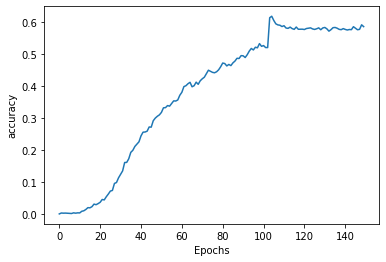

In [ ]:
plot_graphs(history, 'accuracy')